In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import imageio
from scipy.signal import convolve2d
from skimage.util import random_noise
from skimage.filters import gaussian, sobel, laplace

In [3]:
im = imageio.imread("../week3/woman.png")
im.shape

(785, 732)

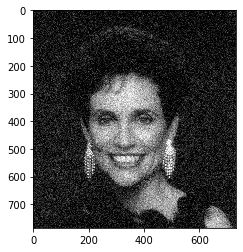

In [4]:
noisy_image = random_noise(im,mode='gaussian',var=0.01)
plt.imshow(noisy_image, cmap='gray')
plt.show()

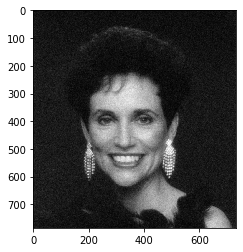

In [5]:
smooth_image = gaussian(noisy_image, sigma=1.0)
plt.imshow(smooth_image, cmap='gray')
plt.show()

In [6]:
sobel_noisy = sobel(noisy_image)
sobel_smooth = sobel(smooth_image)

In [7]:
sobel_noisy.dtype, sobel_smooth.dtype

(dtype('float64'), dtype('float64'))

In [8]:
sobel_smooth.max(), sobel_noisy.max()

(0.30292781731324314, 0.5243771493361823)

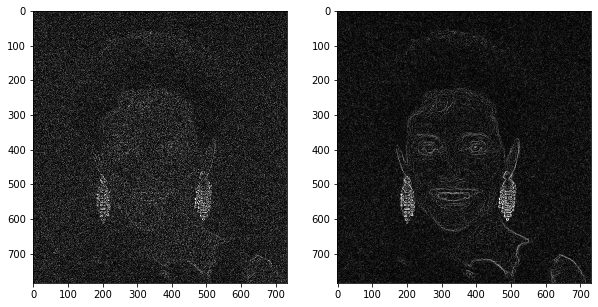

In [9]:
f = plt.figure(figsize=(10,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.imshow(sobel_noisy,cmap="gray")
ax2.imshow(sobel_smooth,cmap="gray")

plt.show()

In [10]:
def plot_hist(image, bins, show_hist):
    hist, bin_edges = np.histogram(image, bins=bins)
    width = (0.8 *  (bin_edges[1] - bin_edges[0]))
    bin_centers =  ((bin_edges[: -1] + bin_edges[1:]) / 2)
    if show_hist==True:
        plt.bar(bin_centers, hist, width=width)
    return hist

array([ 71545, 154319, 151910, 103797,  53950,  22963,   8862,   3363,
         1532,    777,    522,    317,    271,    184,    122,     86,
           50,     29,     12,      9], dtype=int64)

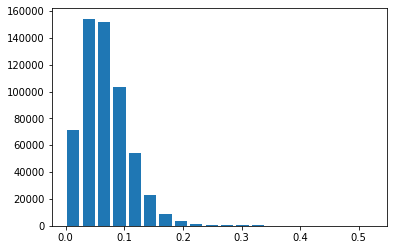

In [11]:
plot_hist(sobel_noisy, 20, show_hist=True)

array([173146, 241794, 106017,  30121,  10120,   4682,   2683,   1654,
         1172,    864,    685,    505,    396,    275,    213,    124,
           81,     45,     28,     15], dtype=int64)

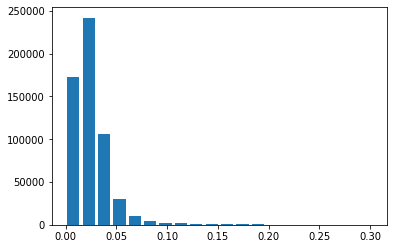

In [12]:
plot_hist(sobel_smooth, 20, show_hist=True)

In [13]:
sobel_smooth.max(), sobel_noisy.max()

(0.30292781731324314, 0.5243771493361823)

In [14]:
sobel_smooth.min(), sobel_noisy.min()

(0.0, 0.0)

In [15]:
threshold_noisy = 0.14
threshold_smooth = 0.05

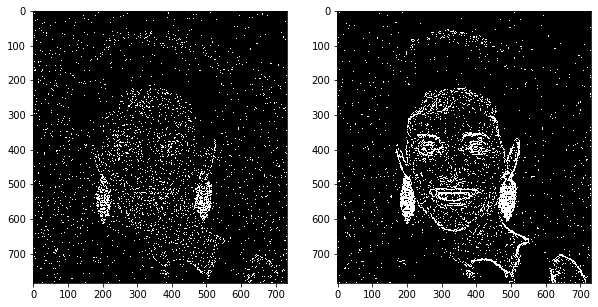

In [16]:
f = plt.figure(figsize=(10,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.imshow(sobel_noisy > threshold_noisy, cmap="gray")
ax2.imshow(sobel_smooth > threshold_smooth, cmap="gray")

plt.show()

If we do edge detection without smoothing it will tell us changes at every point bcs of 1st derivative and after applying smoothing the noisy is reduced and edge in 1st derivative can be detected  easily

# Laplacian operator

In [17]:
laplacian_noisy = laplace(noisy_image)
laplacian_smooth = laplace(smooth_image)

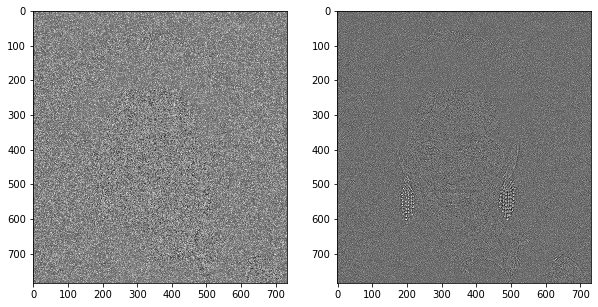

In [18]:
f = plt.figure(figsize=(10,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.imshow(laplacian_noisy, cmap="gray")
ax2.imshow(laplacian_smooth, cmap="gray")

plt.show()

In [66]:
N = [laplacian_smooth[0,1], laplacian_smooth[2,1], laplacian_smooth[1,0], laplacian_smooth[1,2], -0.0784301]
v = 0.01158484
a = [v-i for i in N]
a

[0.01158484,
 -0.013715890450413533,
 0.01158484,
 0.024256209882636492,
 0.09001494]

In [67]:
N = [laplacian_smooth[0,1], laplacian_smooth[2,1], laplacian_smooth[1,0], laplacian_smooth[1,2], -0.0784301]
print("N - {}".format(N))
v = 0.0115548 #laplacian_smooth[1,1]
print("v - {}".format(v))
N = [i for i in N if np.sign(i) != np.sign(v) and i != 0]
print("N - {}".format(N))
if N != []:
    m = min(np.absolute(N))
    print("m - {}".format(m))
    if np.absolute(v) < m:
        d = max(np.absolute([v-i for i in N]))
        print("d - {}".format(d))
        if d > threshold:
            B[i,j] = 1

N - [0.0, 0.025300730450413533, 0.0, -0.012671369882636493, -0.0784301]
v - 0.0115548
N - [-0.012671369882636493, -0.0784301]
m - 0.012671369882636493
d - 0.0899849


In [71]:
def lap_filter_img(img,threshold):
    B = np.zeros(img.shape)
    for i in range(1,img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            v = img[i,j]
            N = [img[i-1,j], img[i+1,j], img[i,j-1], img[i,j+1]]
            N = [i for i in N if np.sign(i) != np.sign(v) and i != 0]
            if N != []:
                m = min(np.absolute(N))
                if np.absolute(v) < m:
                    d = max(np.absolute([v-i for i in N]))
                    if d > threshold:
                        B[i,j] = 1
    return B

In [94]:
lap_smooth = lap_filter_img(laplacian_smooth, 0.07)
lap_noisy = lap_filter_img(laplacian_noisy, 0.06)

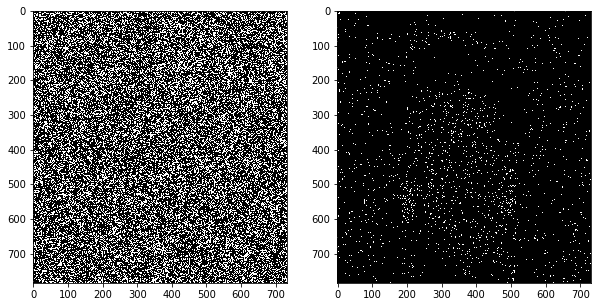

In [95]:
f = plt.figure(figsize=(10,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.imshow(lap_noisy, cmap="gray")
ax2.imshow(lap_smooth, cmap="gray")

plt.show()

In [77]:
lap_smooth

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])